### This notebook illustrates number and brightness analysis (N&B)
Note that this uses photon counting mode data.  Note that you need to have movie.tif from the sim_movie simulation (or from experimental data) loaded into your workspace.
Click here to open in google colab: http://colab.research.google.com/github/jayunruh/pysimfcs/blob/main/n_and_b.ipynb

In [1]:
#if you are using this from google colab, you need the utility modules
#(everything else should already be installed)
import os
if(not os.path.exists('pysimfcs_utils.py')):
    print('downloading pysimfcs libraries')
    !wget https://raw.githubusercontent.com/jayunruh/pysimfcs/refs/heads/main/pysimfcs_utils.py
if(not os.path.exists('analysis_utils.py')):
    !wget https://raw.githubusercontent.com/jayunruh/pysimfcs/refs/heads/main/analysis_utils.py
else:
    print('libraries already downloaded')

libraries already downloaded


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import scipy.ndimage as ndi
import analysis_utils as simutils

In [2]:
#get the jet colormap with the under values set to white
ncmap=simutils.getncmap()

In [3]:
#read in our simulated movie
simstack=tifffile.imread('movie.tif')
simstack.shape

(256, 2, 64, 64)

In [4]:
#here we calculate all of the number and brightness statistic images
sms=2 #the smoothing standard deviation
thresh=0.0 #the threshold for calculating I and B
avg=simstack.mean(axis=0)
var=simstack.var(axis=0)
covar=simutils.covar(simstack[:,0],simstack[:,1])
bright=var/avg-1.0
coavg=np.sqrt(avg[0]*avg[1])
cobright=covar/coavg
mask=avg<thresh #this is a boolean mask image denoting the threshold
avg[mask]=np.nan
bright[mask]=np.nan
coavg[mask[0]]=np.nan
cobright[mask[0]]=np.nan
#now do the smoothing
avgsm=ndi.gaussian_filter(avg,sigma=[0,sms,sms])
brightsm=ndi.gaussian_filter(bright,sigma=[0,sms,sms])
coavgsm=ndi.gaussian_filter(coavg,sigma=sms)
cobrightsm=ndi.gaussian_filter(cobright,sigma=sms)

In [5]:
#get the autoscale information
amax=avg.max()*1.1
brightmax=bright.max()*1.1
print('max average',amax,'max brightness',brightmax)

max average 18.936328125000003 max brightness 7.7164011368547785


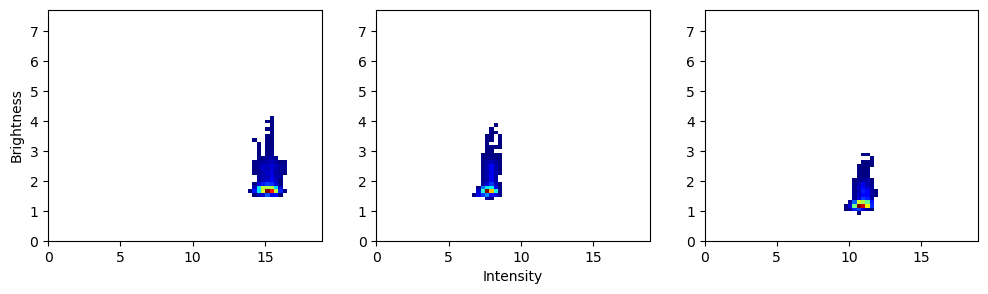

In [7]:
plotavgmax=amax #change this to change the x dimensions of the histogram
plotbrightmax=brightmax #change this to change the y dimensions of the histogram
bins=(np.linspace(0,plotavgmax,64),np.linspace(0,plotbrightmax,64))
plt.figure(figsize=(12,3))
ax=plt.subplot(1,3,1)
_=ax.hist2d(avgsm[0].flat,brightsm[0].flat,bins=bins,cmap=ncmap,vmin=1) #note that vmin=1 here allows the zero bins to be white
ax.set_ylabel('Brightness')
ax=plt.subplot(1,3,2)
_=ax.hist2d(avgsm[1].flat,brightsm[1].flat,bins=bins,cmap=ncmap,vmin=1)
ax.set_xlabel('Intensity')
ax=plt.subplot(1,3,3)
_=ax.hist2d(coavgsm.flat,cobrightsm.flat,bins=bins,cmap=ncmap,vmin=1)

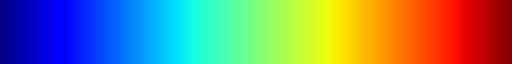

In [9]:
#show the colormap for reference
ncmap